In [ ]:
import pandas as pd
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Downloading the csv file from GitHub account

ratings = "https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv"
download1 = requests.get(ratings).content
ratings = pd.read_csv(io.StringIO(download1.decode('utf-8')))

books = 'https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv'
download2 = requests.get(books).content
books = pd.read_csv(io.StringIO(download2.decode('utf-8')))

book_tags = 'https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/book_tags.csv'
download3 = requests.get(book_tags).content
book_tags = pd.read_csv(io.StringIO(download3.decode('utf-8')))

to_read = 'https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/to_read.csv'
download4 = requests.get(to_read).content
to_read = pd.read_csv(io.StringIO(download4.decode('utf-8')))


tags = 'https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/tags.csv'
download5 = requests.get(tags).content
tags = pd.read_csv(io.StringIO(download5.decode('utf-8')))

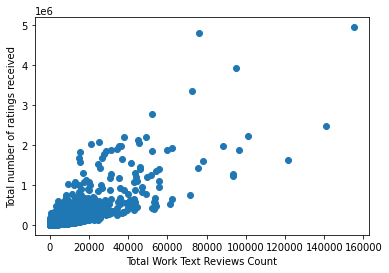

Correlation between number of reviews to that number of ratings: 0.8070090183152889


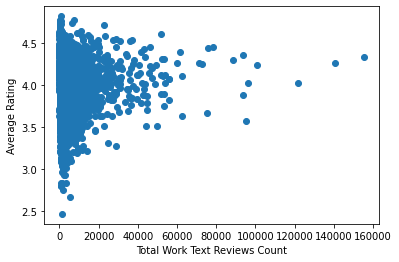

Correlation between number of reviews to that of average rating: 0.007481118668792918


In [ ]:
# ques1
# Do books with more reviews tend to have higher ratings?
plt.scatter(books['work_text_reviews_count'], books['work_ratings_count'])
plt.xlabel('Total Work Text Reviews Count')
plt.ylabel('Total number of ratings received')
plt.show()
correlation = books['work_text_reviews_count'].corr(books['work_ratings_count'])
print("Correlation between number of reviews to that number of ratings:", correlation)

plt.scatter(books['work_text_reviews_count'], books['average_rating'])
plt.xlabel('Total Work Text Reviews Count')
plt.ylabel('Average Rating')
plt.show()
correlation1 = books['work_text_reviews_count'].corr(books['average_rating'])
print("Correlation between number of reviews to that of average rating:", correlation1)


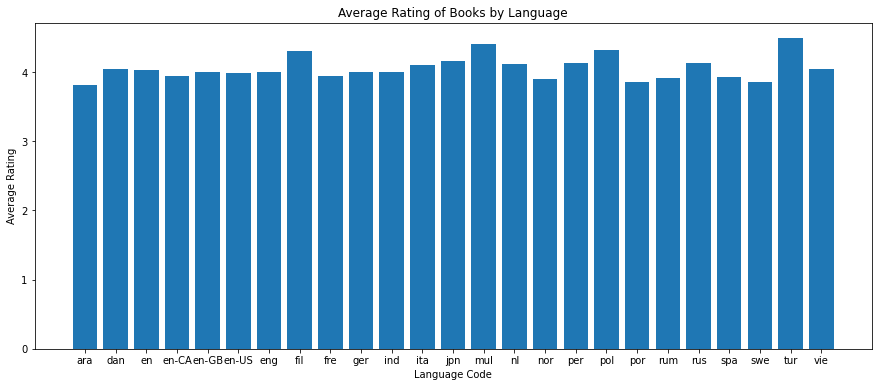

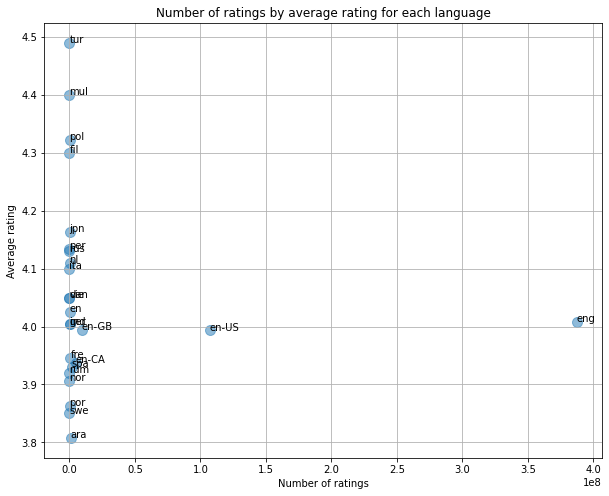

In [ ]:
# ques2
# Calculate the average rating for each language
avg_ratings_by_language = books.groupby('language_code')['average_rating'].mean()

# Plot the average rating by language as a bar chart
plt.figure(figsize=(15,6))
plt.bar(avg_ratings_by_language.index, avg_ratings_by_language.values)
plt.xlabel('Language Code')
plt.ylabel('Average Rating')
plt.title('Average Rating of Books by Language')
plt.show()

# Calculate the total number of ratings for each language
ratings_by_language = books.groupby(['language_code'])['ratings_count'].sum()

# Calculate the average rating for each language
avg_ratings_by_language = books.groupby(['language_code'])['average_rating'].mean()

# Merge the two dataframes on the language_code column
ratings_avg_ratings_by_language = pd.concat([ratings_by_language, avg_ratings_by_language], axis=1).reset_index()

# Set the x and y values for the plot
x = ratings_avg_ratings_by_language['ratings_count']
y = ratings_avg_ratings_by_language['average_rating']
language_codes = ratings_avg_ratings_by_language['language_code']

# Plot the graph
plt.figure(figsize=(10,8))
plt.scatter(x, y, alpha=0.5, s=100)
plt.xlabel('Number of ratings')
plt.ylabel('Average rating')
plt.title('Number of ratings by average rating for each language')
plt.grid(True)

# Add language code labels to the points
for i, code in enumerate(language_codes):
    plt.annotate(code, (x[i], y[i]))

plt.show()


In [ ]:
# ques3
x=500
y=x

# Get the top 100 book IDs from the to_read csv
top_to_read = to_read['book_id'].value_counts().head(x).index.tolist()

# Get the top 100 book IDs from the books csv
top_books = books.sort_values(by='ratings_count', ascending=False)['book_id'].head(x).tolist()

# Check if the two lists have any common book IDs
common_books = list(set(top_to_read) & set(top_books))

if len(common_books) > 0:
    print("There are {} books in common between the top {} books in to_read and the top {} books based on ratings count".format(len(common_books),x,y))
else:
    print("There are no common books between the top {} books in to_read and the top {} books based on ratings count")


There are 303 books in common between the top 500 books in to_read and the top 500 books based on ratings count


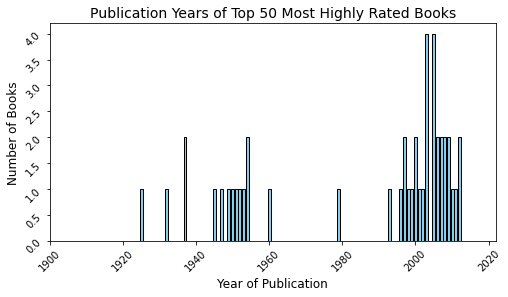

In [ ]:
# ques4
# Get the IDs of the most highly rated books
most_rated_book_ids = ratings.groupby('book_id')['rating'].count().sort_values(ascending=False).head(50).index

# Select the rows for the most highly rated books from the books data
most_rated_books = books[books['book_id'].isin(most_rated_book_ids)]

# Display the publication years for the most highly rated books
# print(most_rated_books[['title', 'original_publication_year']])


# Get the IDs of the most highly rated books
most_rated_book_ids = ratings.groupby('book_id')['rating'].count().sort_values(ascending=False).head(50).index

# Select the rows for the most highly rated books from the books data
most_rated_books = books[books['book_id'].isin(most_rated_book_ids)]

# print("------------------------------------------------------------------------------------------")
# Count the number of books published in each year
publication_years = most_rated_books['original_publication_year'].value_counts().sort_index()

# Set the start and end years for the x-axis
start_year = 1900
end_year = 2022

# Filter the publication years to show only the desired range
publication_years = publication_years[(publication_years.index >= start_year) & (publication_years.index <= end_year)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the bar chart
ax.bar(publication_years.index, publication_years.values, color='skyblue', edgecolor='black')

# Set the axis labels and title
ax.set_xlabel('Year of Publication', fontsize=12)
ax.set_ylabel('Number of Books', fontsize=12)
ax.set_title('Publication Years of Top 50 Most Highly Rated Books', fontsize=14)

# Set the tick label size and orientation
ax.tick_params(axis='both', labelsize=10, rotation=45)

# Set the x-axis limits
ax.set_xlim(start_year, end_year)

# Display the plot
plt.show()


Top 10 years with the most number of books published:
2011.0: 19925 books
2012.0: 19057 books
2009.0: 18235 books
2010.0: 17685 books
2006.0: 17073 books
2008.0: 16974 books
2013.0: 16481 books
2007.0: 16297 books
2005.0: 16254 books
2003.0: 14244 books


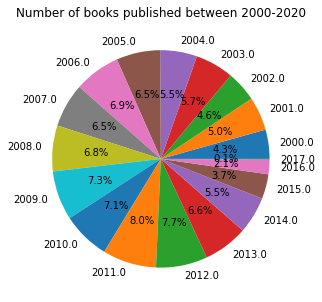

In [ ]:
# ques5
# Group the data by year and sum the book counts
books_by_year = books.groupby('original_publication_year')['books_count'].sum()

# Sort the years by book count in descending order and get the top 10 years
top_years = books_by_year.sort_values(ascending=False).head(10)

# Print the top 10 years and their book counts
print("Top 10 years with the most number of books published:")
for year, count in top_years.items():
    print(f"{year}: {count} books")

# Filter the data for the years between 2000-2020
filtered_books = books[(books['original_publication_year'] >= 2000) & (books['original_publication_year'] <= 2020)]

# Group the data by original publication year and sum the book counts
year_counts = filtered_books.groupby('original_publication_year')['books_count'].sum()

# Plot the pie chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(year_counts.values, labels=year_counts.index, autopct='%1.1f%%')

# Set the title
ax.set_title('Number of books published between 2000-2020')

# Show the plot
plt.show()
